# **House Price Pridiction :**

# **Importing the Packages :**

In [244]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Uploading Dataset :**

In [245]:
data = pd.read_csv("train-chennai-sale.csv")
data

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,03-01-2011,51,1.0,1.0,2,AdjLand,No,...,ELO,No Access,RM,3.0,2.2,2.4,2.520,208767,107060,5353000
7105,P10000,Velachery,1897,08-04-2004,52,3.0,2.0,5,Family,Yes,...,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,346191,205551,10818480
7106,P09594,Velachery,1614,25-08-2006,152,2.0,1.0,4,Normal Sale,No,...,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,317354,167028,8351410
7107,P06508,Karapakkam,787,03-08-2009,40,1.0,1.0,2,Partial,Yes,...,ELO,Paved,RL,4.6,3.8,4.1,4.160,425350,119098,8507000


# **Data Cleaning :**

In [246]:
data.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [247]:
# Features and Target

* **Features :** PRT_ID, AREA, INT_SQFT, DATE_SALE, DIST_MAINROAD, N_BEDROOM,N_BATHROOM, N_ROOM, SALE_COND, PARK_FACIL, DATE_BUILD, BUILDTYPE, UTILITY_AVAIL, STREET, MZZONE, QS_ROOMS, QS_BATHROOM, QS_BEDROOM, QS_OVERALL, REG_FEE, COMMIS .
* **Target :** SALES_PRICE .

In [248]:
# Rows and Columns

In [249]:
data.shape

(7109, 22)

In [250]:
# Checking the datatypes

In [251]:
data.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
REG_FEE            int64
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [252]:
# Cheking Null Values

In [253]:
data.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [254]:
data.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,143070.662010,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,349486.000000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,451562.000000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


In [255]:
data.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

### **ID :**

In [256]:
data.PRT_ID.values[0]

'P03210'

In [257]:
data = data.drop(columns = ['PRT_ID']) # Droping the Id Column

### **Area :**

In [258]:
data.AREA.values[0]

'Karapakkam'

In [259]:
data.AREA = data['AREA'].str.lower() # Bring the text data to lowercase
data.AREA = data['AREA'].str.strip() # Delete unwanted whitespaces

In [260]:
data.AREA.unique()

array(['karapakkam', 'anna nagar', 'adyar', 'velachery', 'chrompet',
       'kk nagar', 'tnagar', 't nagar', 'chrompt', 'chrmpet', 'karapakam',
       'ana nagar', 'chormpet', 'adyr', 'velchery', 'ann nagar',
       'kknagar'], dtype=object)

In [261]:
# Correcting Spelling Mistake

In [262]:
data.AREA = data.AREA.map({'tnagar':'T Nagar','chrompt':'Chrompet','chrmpet':'Chrompet','karapakam':'Karapakkam',
                           'ana nagar':'Anna Nagar','chormpet':'Chrompet','adyr':'Adyar','velchery':'Velachery',
                           'ann nagar':'Anna Nagar','kknagar':'KK Nagar','karapakkam':'Karapakkam', 'anna nagar':'Anna Nagar',
                           'adyar':'Adyar', 'velachery':'Velachery', 'chrompet':'Chrompet','kk nagar':'KK Nagar', 't nagar':'T Nagar'})

In [263]:
data.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'T Nagar'], dtype=object)

In [264]:
data.AREA.value_counts()

Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64

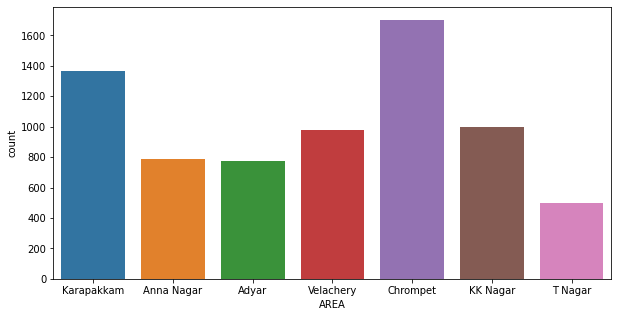

In [265]:
# Distribution Plot
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(x ='AREA', data = data,ax=ax)

In [266]:
df_sorted= data.sort_values('SALES_PRICE')

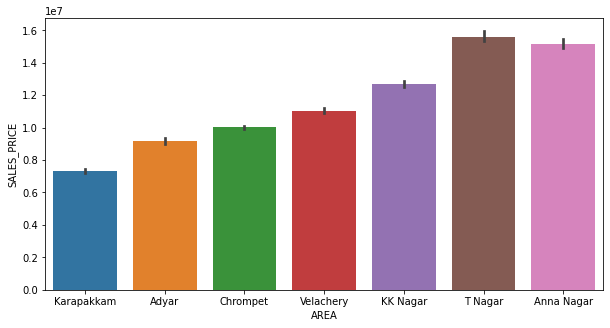

In [267]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x='AREA', y='SALES_PRICE',data=df_sorted, ax=ax)

In [268]:
# Lable Encoding
data["AREA"] = data["AREA"].map({"Karapakkam" : 1, "Adyar" : 2, "Chrompet" : 3, "Velachery" : 4, "KK Nagar" : 5, "Anna Nagar" : 6, "T Nagar" : 7})

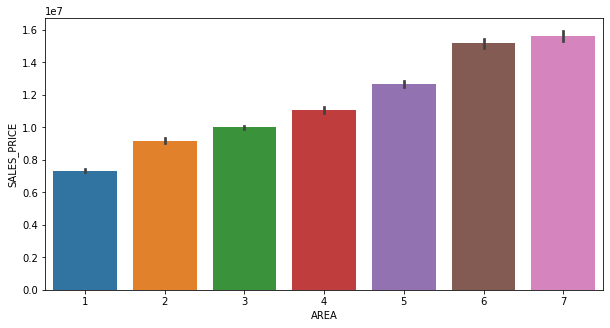

In [269]:
# Feature vs Target
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x='AREA', y='SALES_PRICE',data=data, ax=ax)

In [270]:
data[['AREA','SALES_PRICE']].corr()

,AREA,SALES_PRICE
AREA,1.000000,0.694149
SALES_PRICE,0.694149,1.000000


1. There is a linear relationship between Area and Sales Price .

2. No transformation required .

3. The Sales price will change according to the Area .

4. There is a Linear relationship so we do Label Encoding .

### **Square Feet :**

In [271]:
data.INT_SQFT.values[0]

1004

In [272]:
data.INT_SQFT = data.INT_SQFT.astype('int64') # explicilty type casting

In [273]:
data.INT_SQFT.describe() #summary stats

count    7109.000000
mean     1382.073006
std       457.410902
min       500.000000
25%       993.000000
50%      1373.000000
75%      1744.000000
max      2500.000000
Name: INT_SQFT, dtype: float64

In [274]:
data.INT_SQFT.value_counts()

1781    18
1538    15
1505    13
1514    13
1634    12
        ..
559      1
2479     1
1330     1
880      1
598      1
Name: INT_SQFT, Length: 1699, dtype: int64

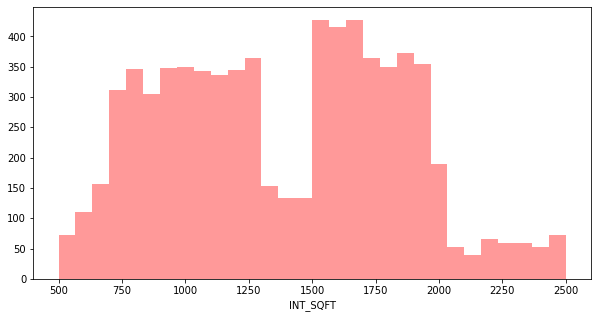

In [275]:
# Distribution Plot
fig, ax = plt.subplots(figsize=(10, 5))
sns.distplot(data['INT_SQFT'],kde = False,color ='red', bins = 30,ax=ax)

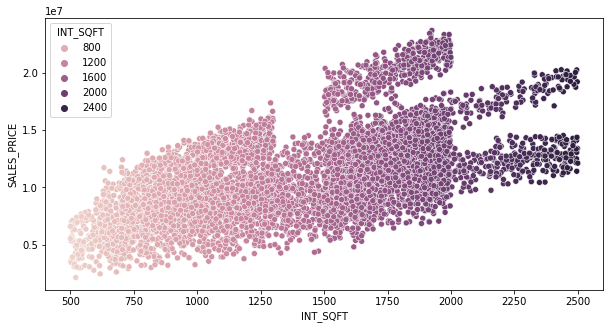

In [276]:
# Feature vs Target
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(x='INT_SQFT', y='SALES_PRICE',data=data, hue = "INT_SQFT",ax=ax)

In [277]:
data[['INT_SQFT','SALES_PRICE']].corr()

,INT_SQFT,SALES_PRICE
INT_SQFT,1.000000,0.612125
SALES_PRICE,0.612125,1.000000


1. There is a linear relationship between Square Feet and Sales Price .

2. No transformation required .

3. As the Square feet increses the price of the house also increases .

### **Date of Sale :**

In [278]:
data.DATE_SALE.values[0]

'04-05-2011'

In [279]:
data['DATE_SALE'] = pd.to_datetime(data['DATE_SALE'])

In [280]:
data.DATE_SALE

0      2011-04-05
1      2006-12-19
2      2012-04-02
3      2010-03-13
4      2009-05-10
          ...    
7104   2011-03-01
7105   2004-08-04
7106   2006-08-25
7107   2009-03-08
7108   2005-07-13
Name: DATE_SALE, Length: 7109, dtype: datetime64[ns]

In [281]:
data['DATE_SALE_YEAR'] = pd.DatetimeIndex(data['DATE_SALE']).year

In [282]:
data['DATE_SALE_YEAR']

0       2011
1       2006
2       2012
3       2010
4       2009
        ... 
7104    2011
7105    2004
7106    2006
7107    2009
7108    2005
Name: DATE_SALE_YEAR, Length: 7109, dtype: int64

### **Date of Build :**

In [283]:
data.DATE_BUILD.values[0]

'15-05-1967'

In [284]:
data['DATE_BUILD'] = pd.to_datetime(data['DATE_BUILD'])

In [285]:
data.DATE_BUILD

0      1967-05-15
1      1995-12-22
2      1992-09-02
3      1988-03-18
4      1979-10-13
          ...    
7104   1962-01-15
7105   1995-11-04
7106   1978-01-09
7107   1977-11-08
7108   1961-07-24
Name: DATE_BUILD, Length: 7109, dtype: datetime64[ns]

In [286]:
data['DATE_BUILD_YEAR'] = pd.DatetimeIndex(data['DATE_BUILD']).year

In [287]:
data['DATE_BUILD_YEAR']

0       1967
1       1995
2       1992
3       1988
4       1979
        ... 
7104    1962
7105    1995
7106    1978
7107    1977
7108    1961
Name: DATE_BUILD_YEAR, Length: 7109, dtype: int64

### **Age of House :**

In [288]:
data['AGE_OF_HOUSE'] = data['DATE_SALE_YEAR'] - data['DATE_BUILD_YEAR']

In [289]:
data['AGE_OF_HOUSE']

0       44
1       11
2       20
3       22
4       30
        ..
7104    49
7105     9
7106    28
7107    32
7108    44
Name: AGE_OF_HOUSE, Length: 7109, dtype: int64

In [290]:
data = data.drop(columns = ['DATE_SALE_YEAR'])

In [291]:
data = data.drop(columns = ['DATE_BUILD_YEAR'])

In [292]:
data = data.drop(columns = ['DATE_SALE'])

In [293]:
data = data.drop(columns = ['DATE_BUILD'])

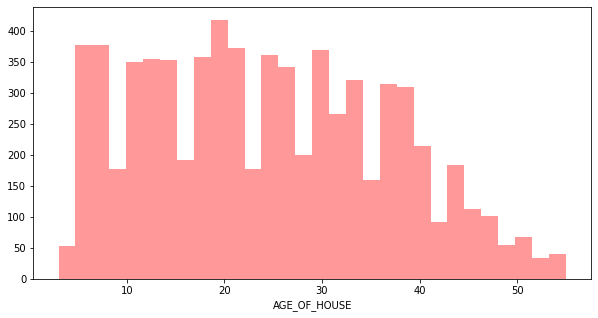

In [294]:
# Distribution Plot
fig, ax = plt.subplots(figsize=(10, 5))
sns.distplot(data['AGE_OF_HOUSE'],kde = False,color ='red', bins = 30,ax=ax)

In [295]:
df_sorted= data.sort_values('SALES_PRICE')

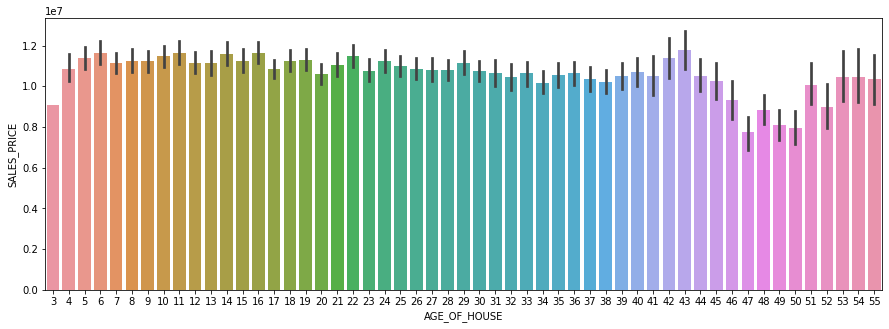

In [296]:
# Feature vs Target
fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(x='AGE_OF_HOUSE', y='SALES_PRICE',data=df_sorted,ax=ax)

In [297]:
data[['AGE_OF_HOUSE','SALES_PRICE']].corr()

,AGE_OF_HOUSE,SALES_PRICE
AGE_OF_HOUSE,1.000000,-0.118842
SALES_PRICE,-0.118842,1.000000


1. There is no linear relationship between Age of the House and Sales Price .

2. Transformation required .


In [298]:
# Transformation
data['TRANSFORMED_AGE_OF_HOUSE'] = np.square(data['AGE_OF_HOUSE'])
# Correlation
data[['TRANSFORMED_AGE_OF_HOUSE','SALES_PRICE']].corr()

,TRANSFORMED_AGE_OF_HOUSE,SALES_PRICE
TRANSFORMED_AGE_OF_HOUSE,1.000000,-0.124443
SALES_PRICE,-0.124443,1.000000


1. Even after Transformation there is no Linear Relationship between Age of the house and Sales Price .

In [299]:
data = data.drop(columns = ['TRANSFORMED_AGE_OF_HOUSE'])

### **Distance To Mainroad :**

In [300]:
data.DIST_MAINROAD.values[0]

131

In [301]:
data.DIST_MAINROAD = data.DIST_MAINROAD.astype('int64') 

In [302]:
data.DIST_MAINROAD.describe()

count    7109.000000
mean       99.603179
std        57.403110
min         0.000000
25%        50.000000
50%        99.000000
75%       148.000000
max       200.000000
Name: DIST_MAINROAD, dtype: float64

In [303]:
sum(data.DIST_MAINROAD == 0)

33

In [304]:
data["DIST_MAINROAD"] = data["DIST_MAINROAD"].replace(0, data["DIST_MAINROAD"].mean())

In [305]:
data.DIST_MAINROAD.describe()

count    7109.000000
mean      100.065537
std        56.998635
min         1.000000
25%        51.000000
50%        99.603179
75%       148.000000
max       200.000000
Name: DIST_MAINROAD, dtype: float64

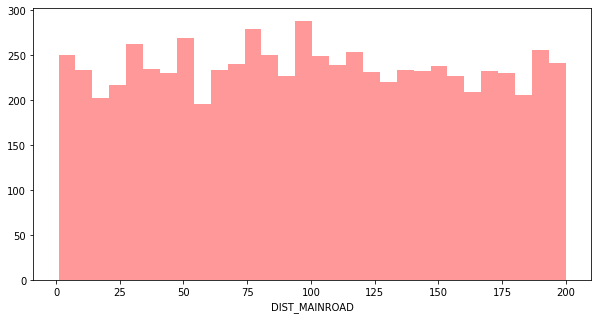

In [306]:
# Distribution Plot
fig, ax = plt.subplots(figsize=(10, 5))
sns.distplot(data['DIST_MAINROAD'],kde = False,color ='red', bins = 30,ax=ax)

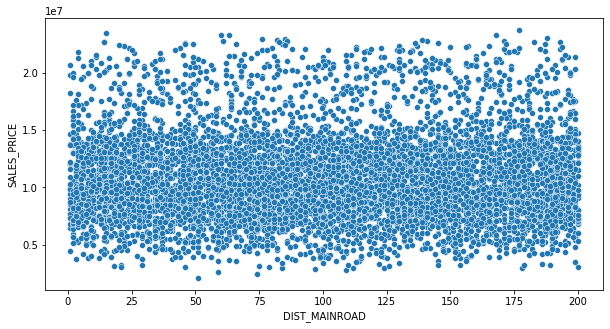

In [307]:
# Feature vs Target
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(x='DIST_MAINROAD', y='SALES_PRICE',data=data,ax=ax)

In [308]:
data[['DIST_MAINROAD','SALES_PRICE']].corr()

,DIST_MAINROAD,SALES_PRICE
DIST_MAINROAD,1.000000,0.018778
SALES_PRICE,0.018778,1.000000


1. There is no linear relationship between Distance to mainroad and Sales Price .

2. Transformation required .


In [309]:
# Transformation
data['TRANSFORMED_DIST_MAINROAD'] = np.square(data['DIST_MAINROAD'])
# Correlation
data[['TRANSFORMED_DIST_MAINROAD','SALES_PRICE']].corr()

,TRANSFORMED_DIST_MAINROAD,SALES_PRICE
TRANSFORMED_DIST_MAINROAD,1.000000,0.021871
SALES_PRICE,0.021871,1.000000


1. Even after Transformation there is no Linear Relationship between Distance to mainroad and Sales Price .

In [310]:
data = data.drop(columns = ['TRANSFORMED_DIST_MAINROAD'])

### **No of Bedroom :**

In [311]:
data.N_BEDROOM.values[0]

1.0

In [312]:
data.N_BEDROOM = data.N_BEDROOM.astype('float') 

In [313]:
data.N_BEDROOM.isnull().sum()

1

In [314]:
data.N_BEDROOM.fillna(1.0,inplace=True)

In [315]:
data.N_BEDROOM.isnull().sum()

0

In [316]:
data.N_BEDROOM.describe()

count    7109.000000
mean        1.636939
std         0.802881
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         4.000000
Name: N_BEDROOM, dtype: float64

In [317]:
data.N_BEDROOM.value_counts()

1.0    3796
2.0    2352
3.0     707
4.0     254
Name: N_BEDROOM, dtype: int64

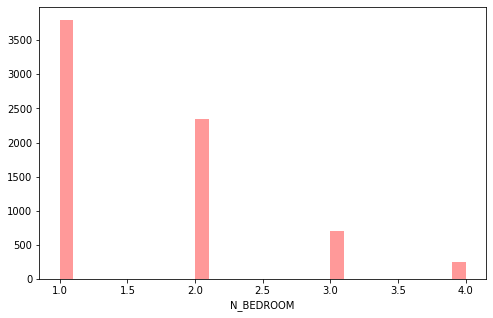

In [318]:
# Distribution Plot
fig, ax = plt.subplots(figsize=(8, 5))
sns.distplot(data['N_BEDROOM'],kde = False,color ='red', bins = 30,ax=ax)

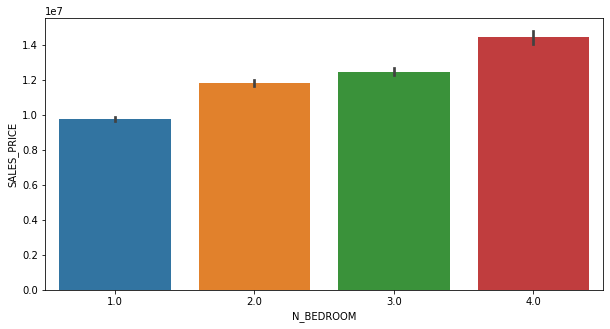

In [319]:
# Feature vs Target
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x='N_BEDROOM', y='SALES_PRICE',data=data,ax=ax)

In [320]:
data[['N_BEDROOM','SALES_PRICE']].corr()

,N_BEDROOM,SALES_PRICE
N_BEDROOM,1.000000,0.330987
SALES_PRICE,0.330987,1.000000


1. There is a linear relationship between No of Bedrooms and Sales Price .

2. No Transformation required .


### **No of Bathroom :**

In [321]:
data.N_BATHROOM.values[0]

1.0

In [322]:
data.N_BATHROOM = data.N_BATHROOM.astype('float') 

In [323]:
data.N_BATHROOM.isnull().sum()

5

In [324]:
data.N_BATHROOM.fillna(1.0,inplace=True)

In [325]:
data.N_BATHROOM.isnull().sum()

0

In [326]:
data.N_BATHROOM.describe()

count    7109.000000
mean        1.213110
std         0.409534
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: N_BATHROOM, dtype: float64

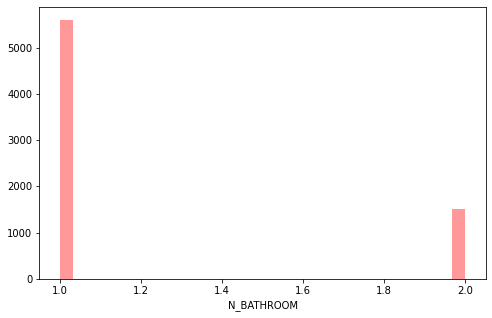

In [327]:
# Distribution Plot
fig, ax = plt.subplots(figsize=(8, 5))
sns.distplot(data['N_BATHROOM'],kde = False,color ='red', bins = 30,ax=ax)

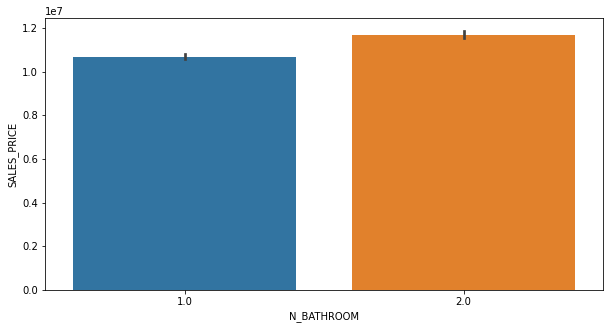

In [328]:
# Feature vs Target
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x='N_BATHROOM', y='SALES_PRICE',data=data,ax=ax)

In [329]:
data[['N_BATHROOM','SALES_PRICE']].corr()

,N_BATHROOM,SALES_PRICE
N_BATHROOM,1.000000,0.108834
SALES_PRICE,0.108834,1.000000


1. There is no linear relationship between No of Bathroom and Sales Price .

2. Transformation required .


In [330]:
# Transformation
data['TRANSFORMED_N_BATHROOM'] = np.square(data['N_BATHROOM'])
# Correlation
data[['TRANSFORMED_N_BATHROOM','SALES_PRICE']].corr()

,TRANSFORMED_N_BATHROOM,SALES_PRICE
TRANSFORMED_N_BATHROOM,1.000000,0.108834
SALES_PRICE,0.108834,1.000000


1. Even after Transformation there is no Linear Relationship between No of Bathrooms and Sales Price .

In [331]:
data = data.drop(columns = ['TRANSFORMED_N_BATHROOM'])

### **No of Rooms :**

In [332]:
data.N_ROOM.values[0]

3

In [333]:
data.N_ROOM = data.N_ROOM.astype('int64') 

In [334]:
data.N_ROOM.describe()

count    7109.000000
mean        3.688704
std         1.019099
min         2.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         6.000000
Name: N_ROOM, dtype: float64

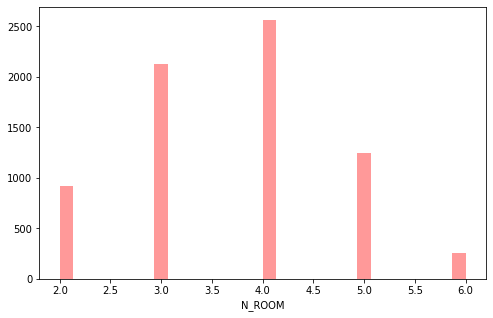

In [335]:
# Distribution Plot
fig, ax = plt.subplots(figsize=(8, 5))
sns.distplot(data['N_ROOM'],kde = False,color ='red', bins = 30,ax=ax)

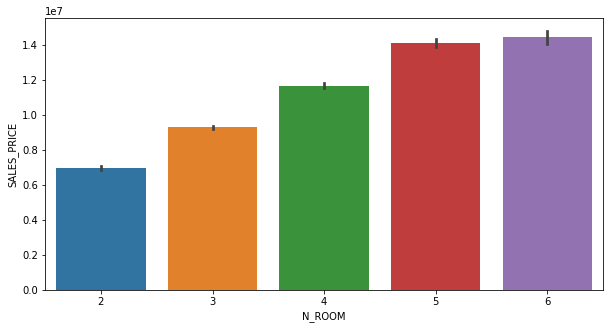

In [336]:
# Feature vs Target
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x='N_ROOM', y='SALES_PRICE',data=data,ax=ax)

In [337]:
data[['N_ROOM','SALES_PRICE']].corr()

,N_ROOM,SALES_PRICE
N_ROOM,1.00000,0.60276
SALES_PRICE,0.60276,1.00000


1. There is a linear relationship between No of Rooms and Sales Price .

2. No Transformation required .


### **Sales Condition :**

In [338]:
data.SALE_COND.values[0]

'AbNormal'

In [339]:
data.SALE_COND = data['SALE_COND'].str.lower()
data.SALE_COND = data['SALE_COND'].str.strip()

In [340]:
data.SALE_COND.unique()

array(['abnormal', 'family', 'partial', 'adjland', 'normal sale',
       'ab normal', 'partiall', 'adj land'], dtype=object)

In [341]:
data.SALE_COND = data.SALE_COND.map({'abnormal':'Abnormal', 'family':'Family', 'partial':'Partial', 'adjland':'AdjLand', 'normal sale':'Normal Sale',
       'ab normal':'Abnormal', 'partiall':'Partial', 'adj land':'AdjLand'})

In [342]:
data.SALE_COND.value_counts()

AdjLand        1439
Partial        1433
Normal Sale    1423
Abnormal       1411
Family         1403
Name: SALE_COND, dtype: int64

In [343]:
df_sorted= data.sort_values('SALE_COND')

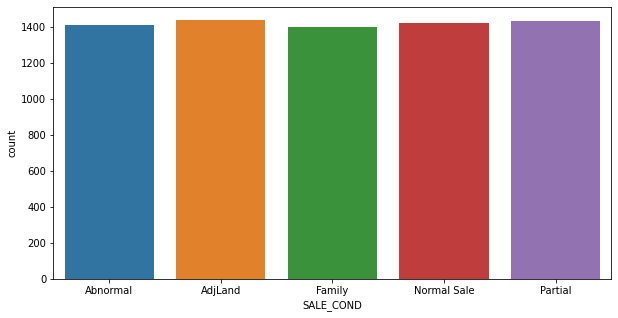

In [344]:
# Distribution Plot
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(x ='SALE_COND', data = df_sorted, ax = ax)

In [345]:
df_sorted= data.sort_values('SALES_PRICE')

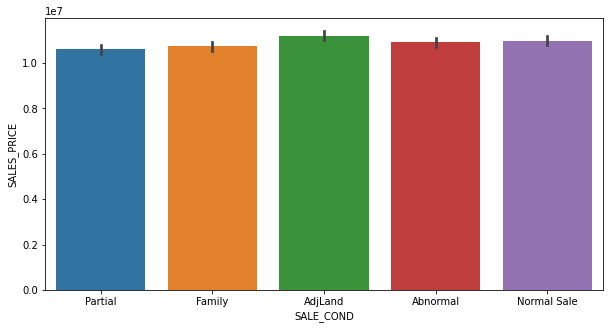

In [346]:
# Feature vs Target
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x='SALE_COND', y='SALES_PRICE',data=df_sorted,ax=ax)

In [347]:
# Lable Encoding
data["SALE_COND"] = data["SALE_COND"].map({"Family" : 1,"Abnormal" : 2, "Normal Sale" : 3, "Partial" : 4, "AdjLand" : 5})

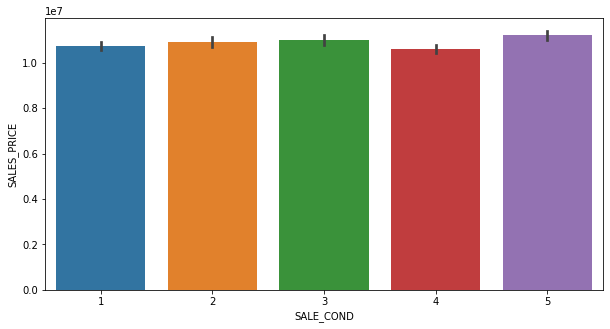

In [348]:
# Feature vs Target
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x='SALE_COND', y='SALES_PRICE',data=data,ax=ax)

In [349]:
data[['SALE_COND','SALES_PRICE']].corr()

,SALE_COND,SALES_PRICE
SALE_COND,1.000000,0.024359
SALES_PRICE,0.024359,1.000000


1. There is non linear relationship between sales condition and Sales Price .

2. Transformation required .

3. The Sales price will change according to the sales condition .



In [350]:
# Transformation
data['TRANSFORMED_SALE_COND'] = np.square(data['SALE_COND'])
# Correlation
data[['TRANSFORMED_SALE_COND','SALES_PRICE']].corr()

,TRANSFORMED_SALE_COND,SALES_PRICE
TRANSFORMED_SALE_COND,1.000000,0.026232
SALES_PRICE,0.026232,1.000000


1. Even after Transformation there is no Linear Relationship between sales condition and Sales Price .

In [351]:
data = data.drop(columns = ['TRANSFORMED_SALE_COND'])

### **Parking Facilities Column:**


In [352]:
data.PARK_FACIL.values[0]

'Yes'

In [353]:
data.PARK_FACIL.unique()

array(['Yes', 'No', 'Noo'], dtype=object)

In [354]:
data.PARK_FACIL = data['PARK_FACIL'].str.lower()
data.PARK_FACIL = data['PARK_FACIL'].str.strip()

In [355]:
data.PARK_FACIL = data.PARK_FACIL.map({'noo':'No','yes':'Yes','no':'No'})

In [356]:
data.PARK_FACIL.value_counts()

Yes    3587
No     3522
Name: PARK_FACIL, dtype: int64

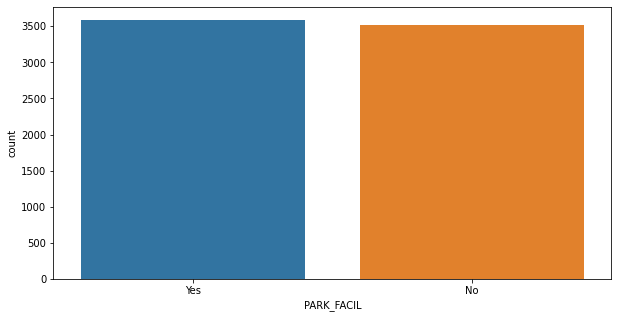

In [357]:
# Distribution Plot
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(x ='PARK_FACIL', data = data, ax = ax)

In [358]:
df_sorted= data.sort_values('PARK_FACIL')

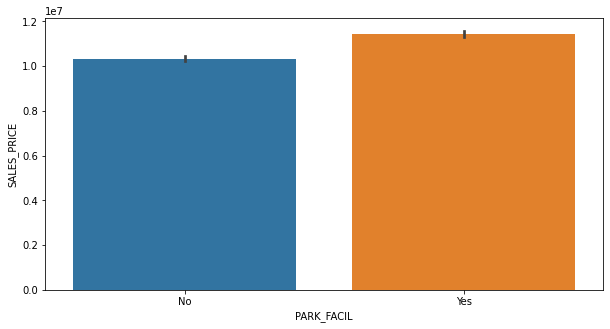

In [359]:
# Feature vs Target
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x='PARK_FACIL', y='SALES_PRICE',data=df_sorted,ax=ax)

In [360]:
# Lable Encoding
data["PARK_FACIL"] = data["PARK_FACIL"].map({"No" : 1,"Yes" : 2})

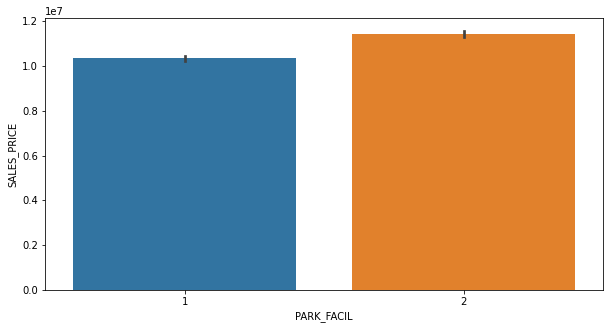

In [361]:
# Feature vs Target
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x='PARK_FACIL', y='SALES_PRICE',data=data,ax=ax)

In [362]:
data[['PARK_FACIL','SALES_PRICE']].corr()

,PARK_FACIL,SALES_PRICE
PARK_FACIL,1.000000,0.146428
SALES_PRICE,0.146428,1.000000


1. There is non linear relationship between parking facility and Sales Price .

2. Transformation required .

3. If there is a parking facility the price of the house will be higher comparing to house without parking .



In [363]:
# Transformation
data['TRANSFORMED_PARK_FACIL'] = np.square(data['PARK_FACIL'])
# Correlation
data[['TRANSFORMED_PARK_FACIL','SALES_PRICE']].corr()

,TRANSFORMED_PARK_FACIL,SALES_PRICE
TRANSFORMED_PARK_FACIL,1.000000,0.146428
SALES_PRICE,0.146428,1.000000


1. Even after Transformation there is no Linear Relationship between parking facility and Sales Price .

In [364]:
data = data.drop(columns = ['TRANSFORMED_PARK_FACIL'])

### **Building Type :**

In [365]:
data.BUILDTYPE.values[0]

'Commercial'

In [366]:
data.BUILDTYPE = data['BUILDTYPE'].str.lower() 
data.BUILDTYPE = data['BUILDTYPE'].str.strip()

In [367]:
data.BUILDTYPE.unique()

array(['commercial', 'others', 'other', 'house', 'comercial'],
      dtype=object)

In [368]:
data.BUILDTYPE = data.BUILDTYPE.map({'commercial':'Commercial','others':'Others','other':'Others','house':'House',
                                     'comercial':'Commercial'})

In [369]:
data.BUILDTYPE.value_counts()

House         2444
Others        2336
Commercial    2329
Name: BUILDTYPE, dtype: int64

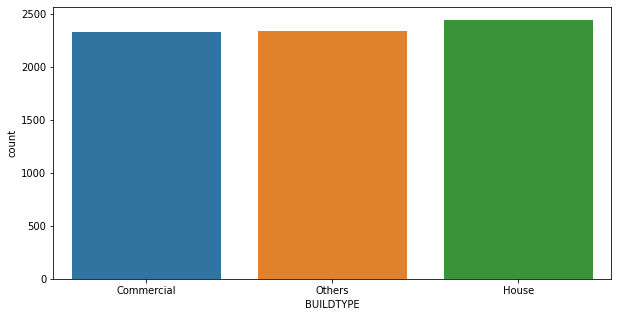

In [370]:
# Distribution Plot
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(x ='BUILDTYPE', data = data, ax = ax)

In [371]:
df_sorted= data.sort_values('SALES_PRICE')

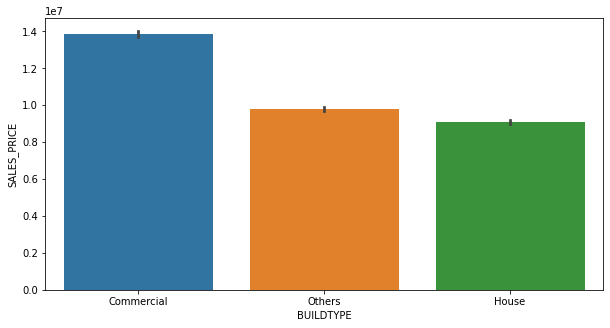

In [372]:
# Feature vs Target
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x='BUILDTYPE', y='SALES_PRICE',data=data,ax=ax)

In [373]:
# Lable Encoding
data["BUILDTYPE"] = data["BUILDTYPE"].map({"Commercial" : 1,"Others" : 2, "House" : 3})

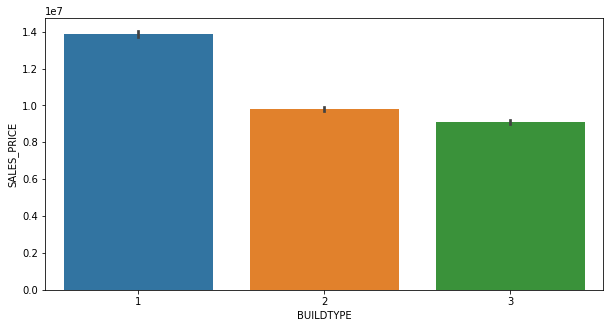

In [374]:
# Feature vs Target
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x='BUILDTYPE', y='SALES_PRICE',data=data,ax=ax)

In [375]:
data[['BUILDTYPE','SALES_PRICE']].corr()

,BUILDTYPE,SALES_PRICE
BUILDTYPE,1.000000,-0.515717
SALES_PRICE,-0.515717,1.000000


1. There is linear relationship between Built Type and Sales Price .

2. No Transformation required .

3. If the building is for commercial then the price of the building is high and if the building is House it is less than all category .

4. Negative Correlation .



### **Utility Available :**

In [376]:
data.UTILITY_AVAIL.values[0]

'AllPub'

In [377]:
data.UTILITY_AVAIL = data['UTILITY_AVAIL'].str.lower() 
data.UTILITY_AVAIL = data['UTILITY_AVAIL'].str.strip()

In [378]:
data.UTILITY_AVAIL.unique()

array(['allpub', 'elo', 'nosewr', 'nosewa', 'all pub'], dtype=object)

In [379]:
data.UTILITY_AVAIL = data.UTILITY_AVAIL.map({'allpub':'AllPub','elo':'Elo','nosewr':'Nosewr','nosewa':'Nosewa',
                                             'all pub':'AllPub'})

In [380]:
data.UTILITY_AVAIL.value_counts()

AllPub    1887
Nosewa    1871
Nosewr    1829
Elo       1522
Name: UTILITY_AVAIL, dtype: int64

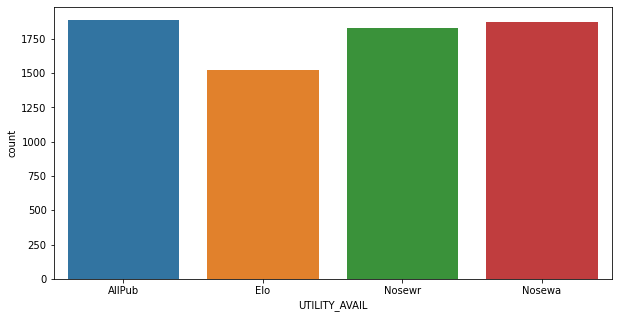

In [381]:
# Distribution Plot
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(x ='UTILITY_AVAIL', data = data, ax = ax)

In [382]:
df_sorted= data.sort_values('SALES_PRICE')

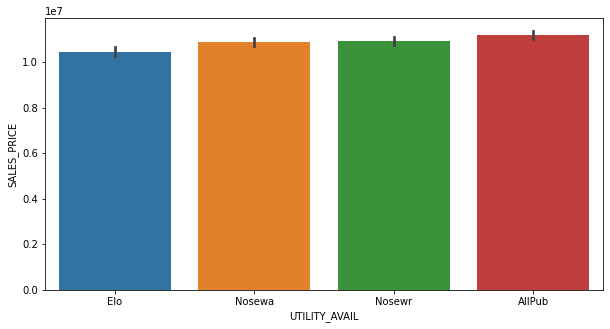

In [383]:
# Feature vs Target
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x='UTILITY_AVAIL', y='SALES_PRICE',data=df_sorted,ax=ax)

In [384]:
# Lable Encoding
data["UTILITY_AVAIL"] = data["UTILITY_AVAIL"].map({"Elo" : 1,"Nosewa" : 2, "Nosewr" : 3, "AllPub" : 4})

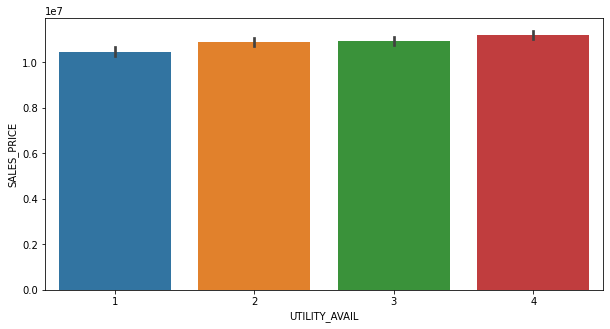

In [385]:
# Feature vs Target
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x='UTILITY_AVAIL', y='SALES_PRICE',data=data,ax=ax)

In [386]:
data[['UTILITY_AVAIL','SALES_PRICE']].corr()

,UTILITY_AVAIL,SALES_PRICE
UTILITY_AVAIL,1.000000,0.064418
SALES_PRICE,0.064418,1.000000


1. There is non linear relationship between Utility Available and Sales Price .

2. Transformation required .




In [387]:
# Transformation
data['TRANSFORMED_UTILITY_AVAIL'] = np.square(data['UTILITY_AVAIL'])
# Correlation
data[['TRANSFORMED_UTILITY_AVAIL','SALES_PRICE']].corr()

,TRANSFORMED_UTILITY_AVAIL,SALES_PRICE
TRANSFORMED_UTILITY_AVAIL,1.000000,0.061846
SALES_PRICE,0.061846,1.000000


1. Even after Transformation there is no Linear Relationship between UTILITY AVAILABLE and Sales Price .

In [388]:
data = data.drop(columns = ['TRANSFORMED_UTILITY_AVAIL'])

### **Street Road Type:**

In [389]:
data.STREET.values[0]

'Paved'

In [390]:
data.STREET = data['STREET'].str.lower() 
data.STREET = data['STREET'].str.strip()

In [391]:
data.STREET.unique()

array(['paved', 'gravel', 'no access', 'pavd', 'noaccess'], dtype=object)

In [392]:
data.STREET = data.STREET.map({'paved':'Paved','gravel':'Gravel','no access':'No Access','pavd':'Paved',
                               'noaccess':'No Access'})

In [393]:
data.STREET.value_counts()

Paved        2572
Gravel       2520
No Access    2017
Name: STREET, dtype: int64

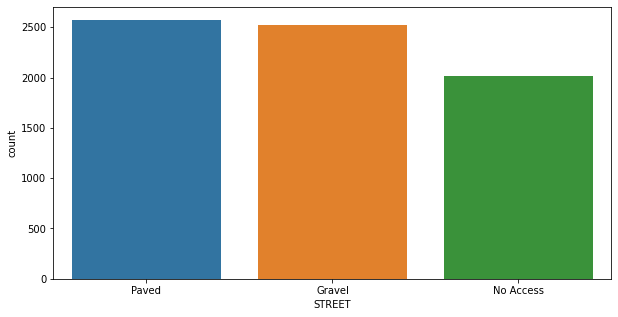

In [394]:
# Distribution Plot
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(x ='STREET', data = data, ax = ax)

In [395]:
df_sorted= data.sort_values('SALES_PRICE')

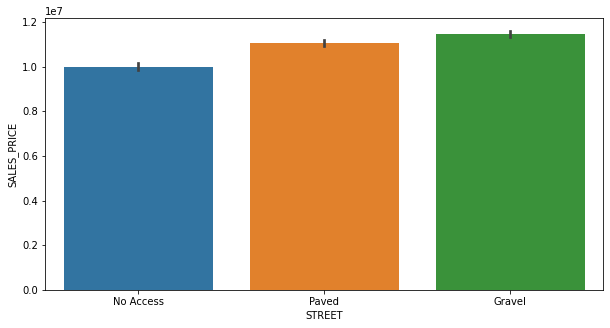

In [396]:
# Feature vs Target
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x='STREET', y='SALES_PRICE',data=df_sorted,ax=ax)

In [397]:
# Lable Encoding
data["STREET"] = data["STREET"].map({"No Access" : 1,"Paved" : 2, "Gravel" : 3})

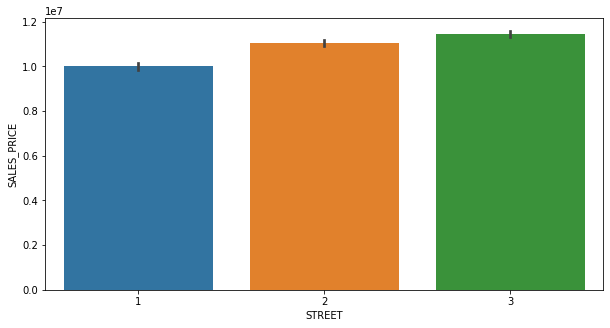

In [398]:
# Feature vs Target
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x='STREET', y='SALES_PRICE',data=data,ax=ax)

In [399]:
data[['STREET','SALES_PRICE']].corr()

,STREET,SALES_PRICE
STREET,1.000000,0.149589
SALES_PRICE,0.149589,1.000000


1. There is non linear relationship between Street and Sales Price .

2. Transformation required .




In [400]:
# Transformation
data['TRANSFORMED_STREET'] = np.square(data['STREET'])
# Correlation
data[['TRANSFORMED_STREET','SALES_PRICE']].corr()

,TRANSFORMED_STREET,SALES_PRICE
TRANSFORMED_STREET,1.00000,0.14167
SALES_PRICE,0.14167,1.00000


1. Even after Transformation there is no Linear Relationship between STREET and Sales Price .

In [401]:
data = data.drop(columns = ['TRANSFORMED_STREET'])

### **MZ Zone :**

In [402]:
data.MZZONE.values[0]

'A'

In [403]:
data.MZZONE.unique()

array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)

In [404]:
data.MZZONE = data.MZZONE.map({'A':'Agriculture','RH':'Recidence_High_Density','RL':'Recidence_Low_Density','I':'Industrial',
                               'C':'Commercial','RM':'Recidence_Medium_Density'})

In [405]:
data.MZZONE.value_counts()

Recidence_Low_Density       1858
Recidence_High_Density      1822
Recidence_Medium_Density    1817
Commercial                   550
Agriculture                  537
Industrial                   525
Name: MZZONE, dtype: int64

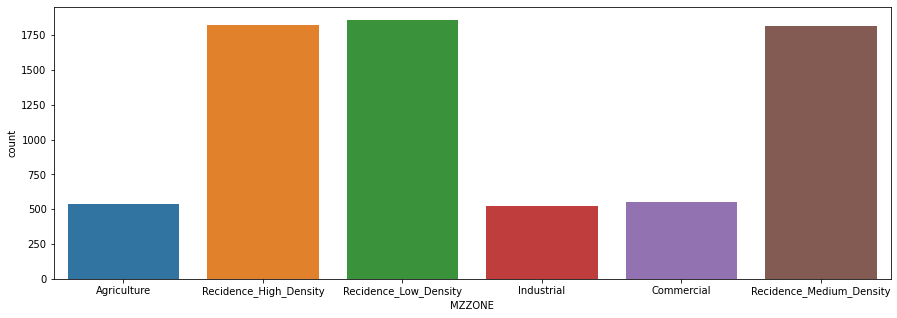

In [406]:
# Distribution Plot
fig, ax = plt.subplots(figsize=(15, 5))
sns.countplot(x ='MZZONE', data = data, ax = ax)

In [407]:
df_sorted= data.sort_values('SALES_PRICE')

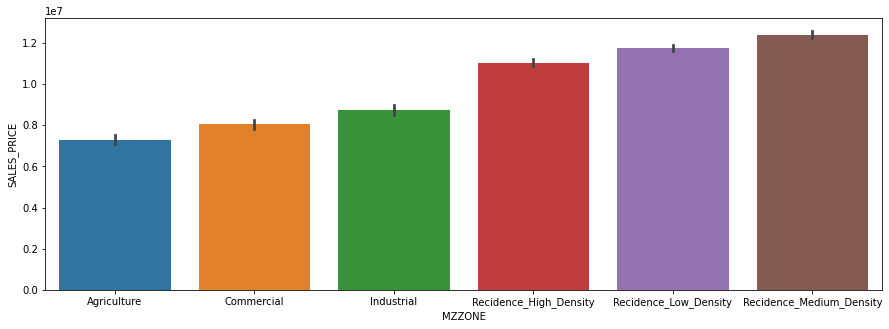

In [408]:
# Feature vs Target
fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(x='MZZONE', y='SALES_PRICE',data=df_sorted,ax=ax)

In [409]:
# Lable Encoding
data["MZZONE"] = data["MZZONE"].map({"Agriculture" : 1,"Commercial" : 2, "Industrial" : 3,"Recidence_High_Density" : 4,"Recidence_Low_Density" : 5, "Recidence_Medium_Density" : 6})

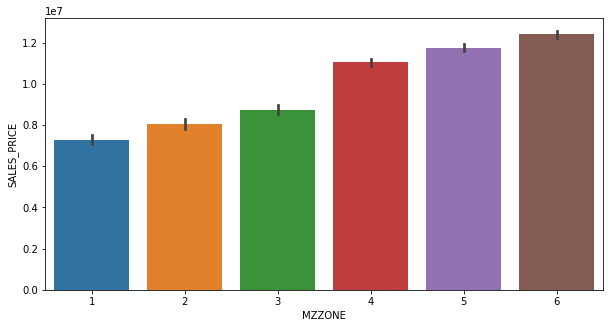

In [410]:
# Feature vs Target
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x='MZZONE', y='SALES_PRICE',data=data,ax=ax)

In [411]:
data[['MZZONE','SALES_PRICE']].corr()

,MZZONE,SALES_PRICE
MZZONE,1.000000,0.427789
SALES_PRICE,0.427789,1.000000


1. There is linear relationship between MZZONE and Sales Price .

2. No Transformation required .

3. According to the zone the price increses 

4. The price of the Recidencial medium density has higher sales price and Agriculture land have lower sales price .



### **QS_ROOMS :**         

In [412]:
data.QS_ROOMS.values[0]

4.0

In [413]:
data.QS_ROOMS = data.QS_ROOMS.astype('float') 

In [414]:
data.QS_ROOMS.describe()

count    7109.000000
mean        3.517471
std         0.891972
min         2.000000
25%         2.700000
50%         3.500000
75%         4.300000
max         5.000000
Name: QS_ROOMS, dtype: float64

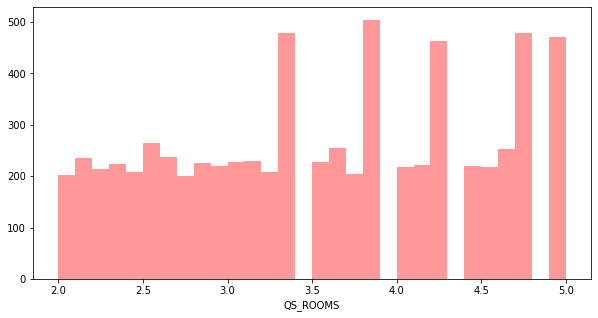

In [415]:
# Distribution Plot
fig, ax = plt.subplots(figsize=(10, 5))
sns.distplot(data['QS_ROOMS'],kde = False,color ='red', bins = 30,ax=ax)

In [416]:
df_sorted= data.sort_values('QS_ROOMS')

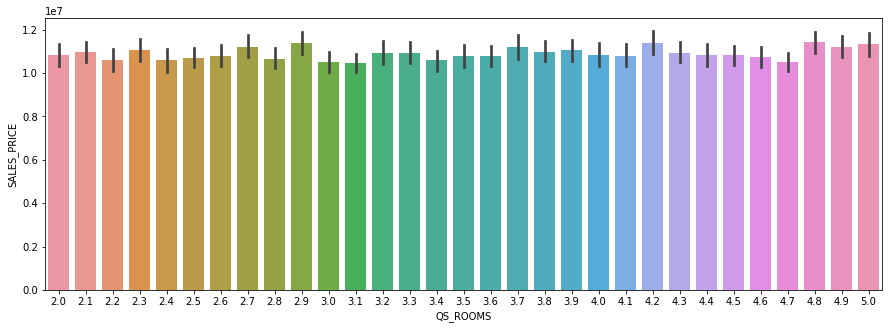

In [417]:
# Feature vs Target
fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(x='QS_ROOMS', y='SALES_PRICE',data=df_sorted,ax=ax)

In [418]:
data[['QS_ROOMS','SALES_PRICE']].corr()

,QS_ROOMS,SALES_PRICE
QS_ROOMS,1.000000,0.021967
SALES_PRICE,0.021967,1.000000


1. There is no linear relationship between QS Room and Sales Price .

2. Transformation required .


In [419]:
# Transformation
data['TRANSFORMED_QS_ROOMS'] = np.square(data['QS_ROOMS'])
# Correlation
data[['TRANSFORMED_QS_ROOMS','SALES_PRICE']].corr()

,TRANSFORMED_QS_ROOMS,SALES_PRICE
TRANSFORMED_QS_ROOMS,1.000000,0.023204
SALES_PRICE,0.023204,1.000000


1. Even after Transformation there is no Linear Relationship between QS Rooms and Sales Price .

In [420]:
data = data.drop(columns = ['TRANSFORMED_QS_ROOMS'])

### **QS_BATHROOM :**

In [421]:
data.QS_BATHROOM.values[0]

3.9

In [422]:
data.QS_BATHROOM = data.QS_BATHROOM.astype('float') 

In [423]:
data.QS_BATHROOM.describe()

count    7109.000000
mean        3.507244
std         0.897834
min         2.000000
25%         2.700000
50%         3.500000
75%         4.300000
max         5.000000
Name: QS_BATHROOM, dtype: float64

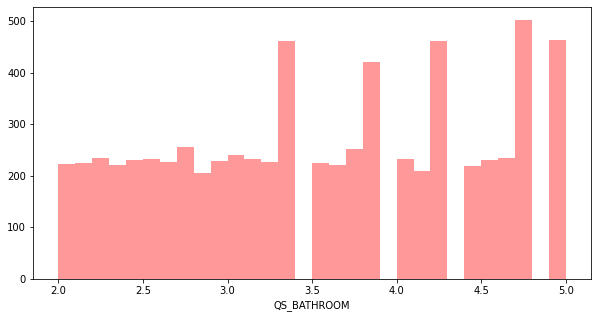

In [424]:
# Distribution Plot
fig, ax = plt.subplots(figsize=(10, 5))
sns.distplot(data['QS_BATHROOM'],kde = False,color ='red', bins = 30,ax=ax)

In [425]:
df_sorted= data.sort_values('SALES_PRICE')

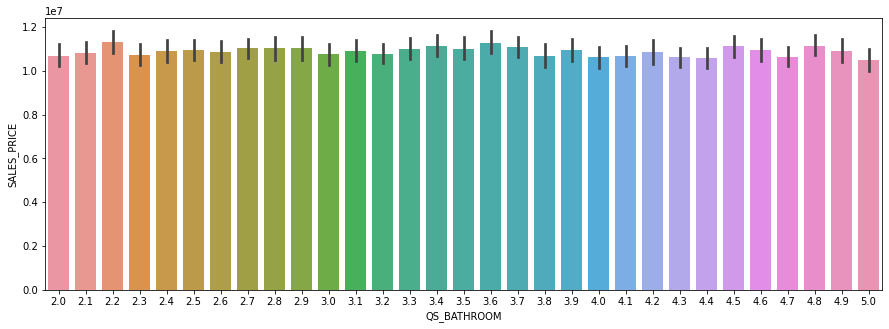

In [426]:
# Feature vs Target
fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(x='QS_BATHROOM', y='SALES_PRICE',data=df_sorted,ax=ax)

In [427]:
data[['QS_BATHROOM','SALES_PRICE']].corr()

,QS_BATHROOM,SALES_PRICE
QS_BATHROOM,1.000000,-0.011377
SALES_PRICE,-0.011377,1.000000


1. There is no linear relationship between QS Bathroom and Sales Price .

2. Transformation required .


In [428]:
# Transformation
data['TRANSFORMED_QS_BATHROOM'] = np.square(data['QS_BATHROOM'])
# Correlation
data[['TRANSFORMED_QS_BATHROOM','SALES_PRICE']].corr()

,TRANSFORMED_QS_BATHROOM,SALES_PRICE
TRANSFORMED_QS_BATHROOM,1.000000,-0.012479
SALES_PRICE,-0.012479,1.000000


1. Even after Transformation there is no Linear Relationship between QS_BATHROOM and Sales Price .

In [429]:
data = data.drop(columns = ['TRANSFORMED_QS_BATHROOM'])

### **QS_BEDROOM :**

In [430]:
data.QS_BEDROOM.values[0]

4.9

In [431]:
data.QS_BEDROOM = data.QS_BEDROOM.astype('float') 

In [432]:
data.QS_BEDROOM.describe()

count    7109.000000
mean        3.485300
std         0.887266
min         2.000000
25%         2.700000
50%         3.500000
75%         4.300000
max         5.000000
Name: QS_BEDROOM, dtype: float64

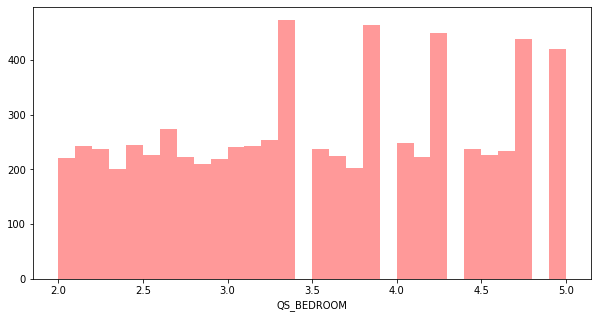

In [433]:
# Distribution Plot
fig, ax = plt.subplots(figsize=(10, 5))
sns.distplot(data['QS_BEDROOM'],kde = False,color ='red', bins = 30,ax=ax)

In [434]:
df_sorted= data.sort_values('SALES_PRICE')

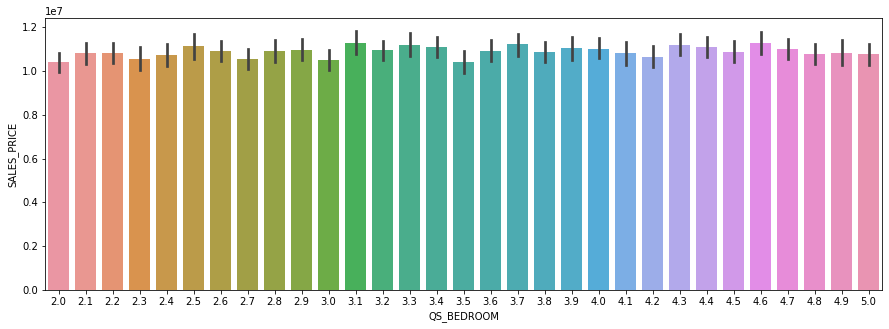

In [435]:
# Feature vs Target
fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(x='QS_BEDROOM', y='SALES_PRICE',data=df_sorted,ax=ax)

In [436]:
data[['QS_BEDROOM','SALES_PRICE']].corr()

,QS_BEDROOM,SALES_PRICE
QS_BEDROOM,1.000000,0.018804
SALES_PRICE,0.018804,1.000000


1. There is no linear relationship between QS Bedroom and Sales Price .

2. Transformation required .


In [437]:
# Transformation
data['TRANSFORMED_QS_BEDROOM'] = np.square(data['QS_BEDROOM'])
# Correlation
data[['TRANSFORMED_QS_BEDROOM','SALES_PRICE']].corr()

,TRANSFORMED_QS_BEDROOM,SALES_PRICE
TRANSFORMED_QS_BEDROOM,1.000000,0.016491
SALES_PRICE,0.016491,1.000000


1. Even after Transformation there is no Linear Relationship between QS_Bedroom and Sales Price .

In [438]:
data = data.drop(columns = ['TRANSFORMED_QS_BEDROOM'])

### **QS_OVERALL :**

In [439]:
data.QS_OVERALL.values[0]

4.33

In [440]:
data.QS_OVERALL = data.QS_OVERALL.astype('float') 

In [441]:
data.QS_OVERALL = (data.QS_BATHROOM + data.QS_BEDROOM + data.QS_ROOMS)/3

In [442]:
data.QS_OVERALL.isnull().sum()

0

In [443]:
data.QS_OVERALL.describe()

count    7109.000000
mean        3.503338
std         0.516045
min         2.000000
25%         3.133333
50%         3.500000
75%         3.866667
max         4.966667
Name: QS_OVERALL, dtype: float64

In [444]:
data.QS_OVERALL.value_counts()

3.433333    166
3.166667    163
3.666667    161
3.233333    160
3.333333    158
           ... 
2.000000      1
4.966667      1
4.700000      1
4.900000      1
3.800000      1
Name: QS_OVERALL, Length: 163, dtype: int64

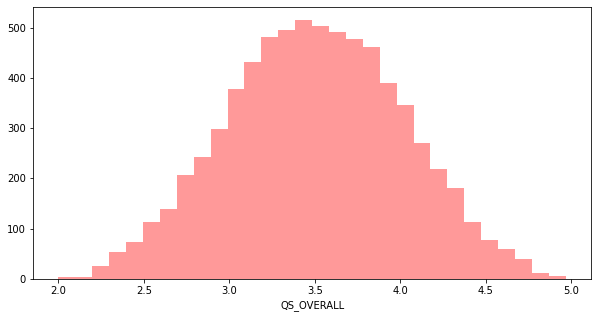

In [445]:
# Distribution Plot
fig, ax = plt.subplots(figsize=(10, 5))
sns.distplot(data['QS_OVERALL'],kde = False,color ='red', bins = 30,ax=ax)

In [446]:
df_sorted= data.sort_values('SALES_PRICE')

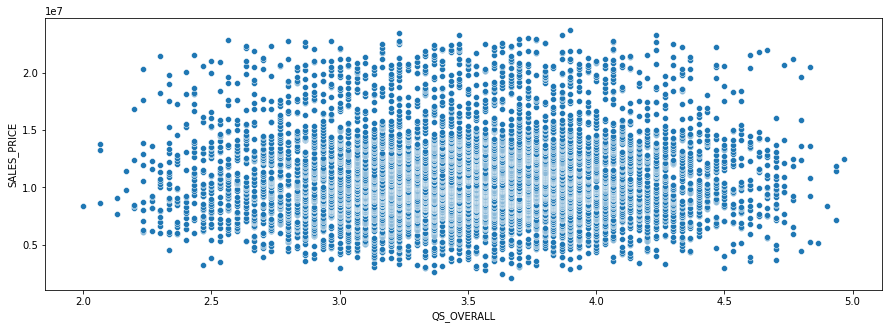

In [447]:
# Feature vs Target
fig, ax = plt.subplots(figsize=(15, 5))
sns.scatterplot(x='QS_OVERALL', y='SALES_PRICE',data=df_sorted,ax=ax)

In [448]:
data[['QS_OVERALL','SALES_PRICE']].corr()

,QS_OVERALL,SALES_PRICE
QS_OVERALL,1.000000,0.016835
SALES_PRICE,0.016835,1.000000


1. There is no linear relationship between QS_OVERALL and Sales Price .


2. Transformation required .


In [449]:
# Transformation
data['TRANSFORMED_QS_OVERALL'] = np.square(data['QS_OVERALL'])
# Correlation
data[['TRANSFORMED_QS_OVERALL','SALES_PRICE']].corr()

,TRANSFORMED_QS_OVERALL,SALES_PRICE
TRANSFORMED_QS_OVERALL,1.000000,0.017103
SALES_PRICE,0.017103,1.000000


1. Even after Transformation there is no Linear Relationship between QS_OVERALL and Sales Price .

In [450]:
data = data.drop(columns = ['TRANSFORMED_QS_OVERALL'])

### **Registration Fees :**

In [451]:
data = data.drop(columns = ['REG_FEE'])

### **Commision :**

In [452]:
data = data.drop(columns = ['COMMIS'])

### **Target Variable ( SALES_PRICE ):**

0.7733433358864348


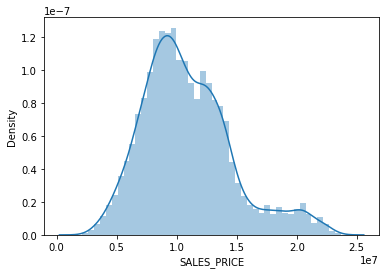

In [453]:
target_skew = data['SALES_PRICE'].skew()
print(target_skew)
sns.distplot(data['SALES_PRICE'])

-0.27310178620365555


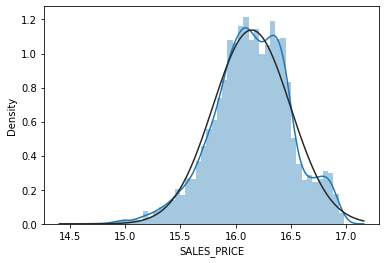

In [454]:
from scipy.stats import norm, skew
sns.distplot(np.log1p(data['SALES_PRICE']), fit = norm)
print(np.log1p(data['SALES_PRICE']).skew())

-0.2731019222517942


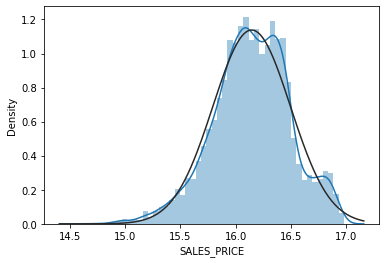

In [455]:
sns.distplot(np.log(data['SALES_PRICE']), fit = norm)
print(np.log(data['SALES_PRICE']).skew())

-0.27304429433000926


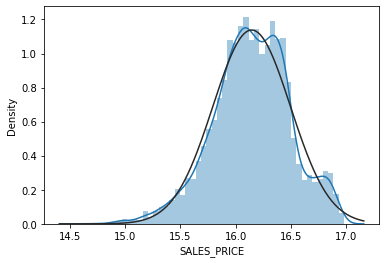

In [456]:
from scipy.stats import skew
from scipy.special import boxcox
sns.distplot(boxcox(data['SALES_PRICE'], 0), fit = norm)
print(skew(boxcox(data['SALES_PRICE'], 0)))

In [457]:
data['SALES_PRICE'] = np.log1p(data['SALES_PRICE'])

In [458]:
data['SALES_PRICE'].skew()

-0.27310178620365555

* The rule of thumb seems to be: If the skewness is between -0.5 and 0.5, the data are fairly symmetrical.

## **Correlation :**

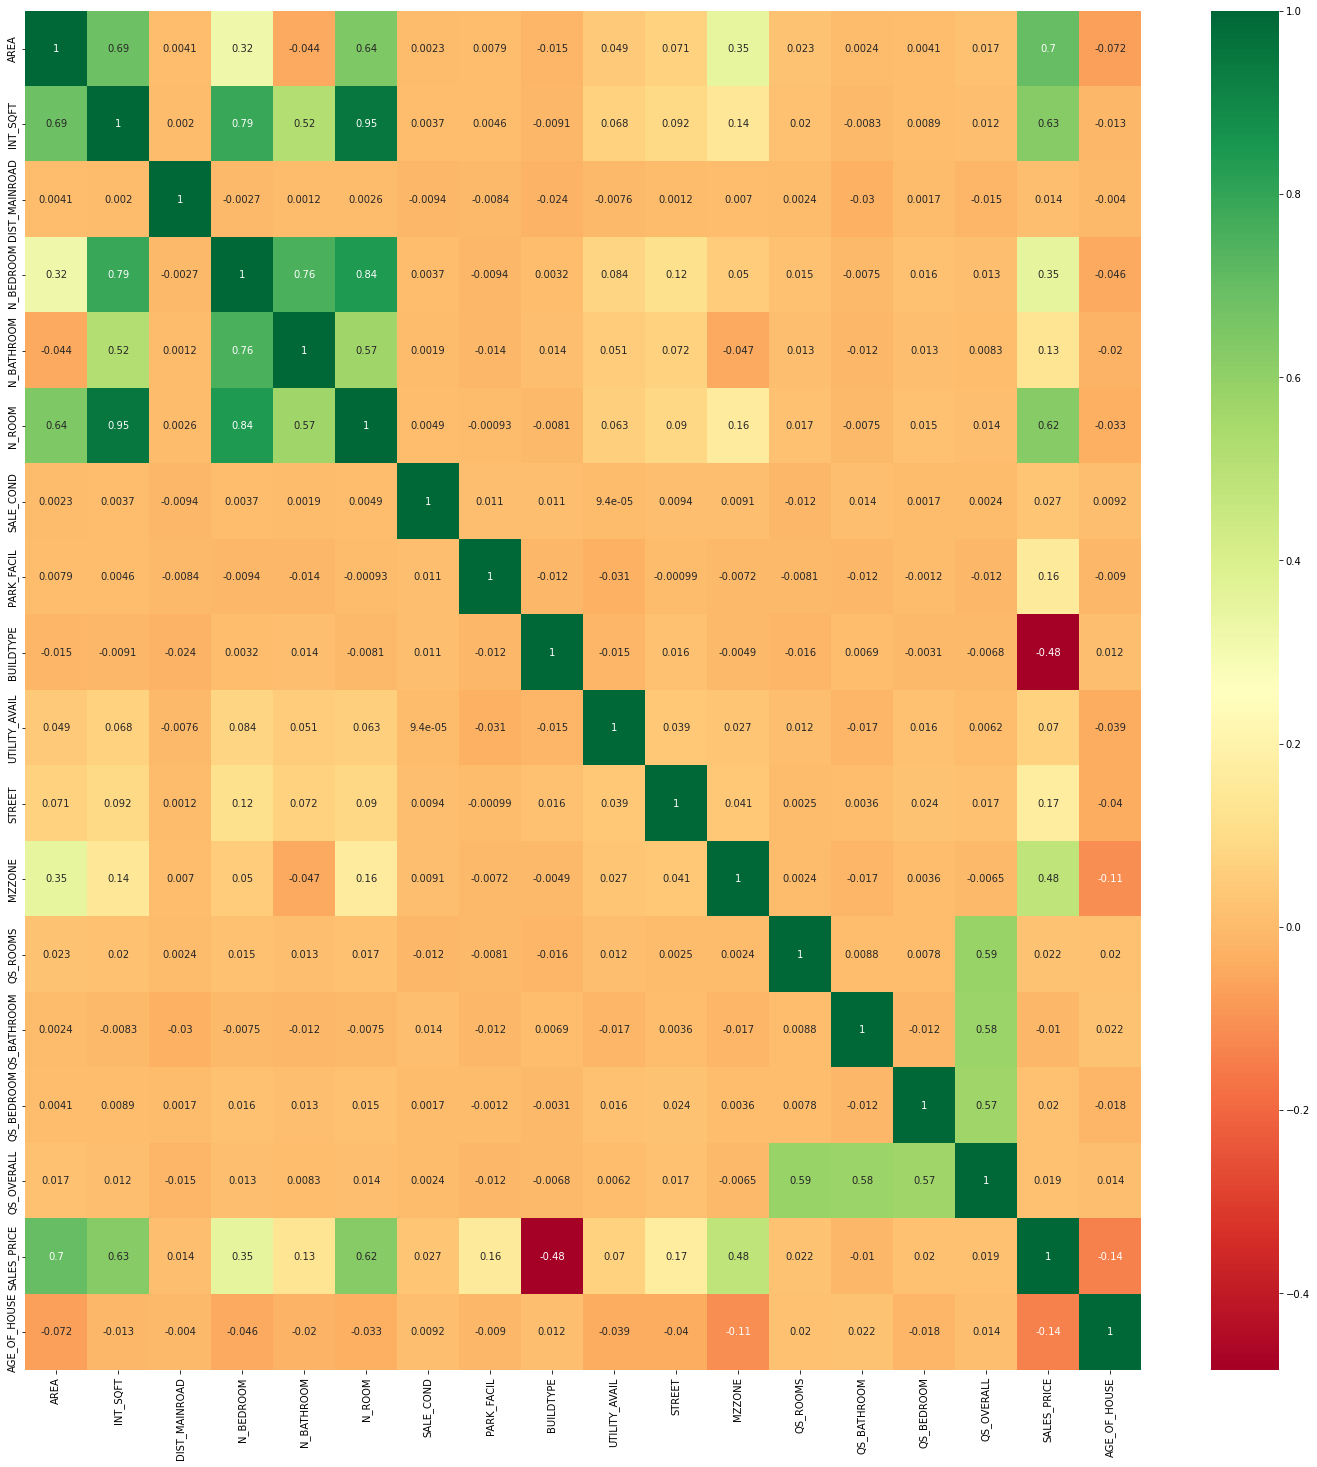

In [459]:
plt.figure(figsize=(25,25))
sns.heatmap(data.corr(),cbar=True,annot=True,cmap="RdYlGn")

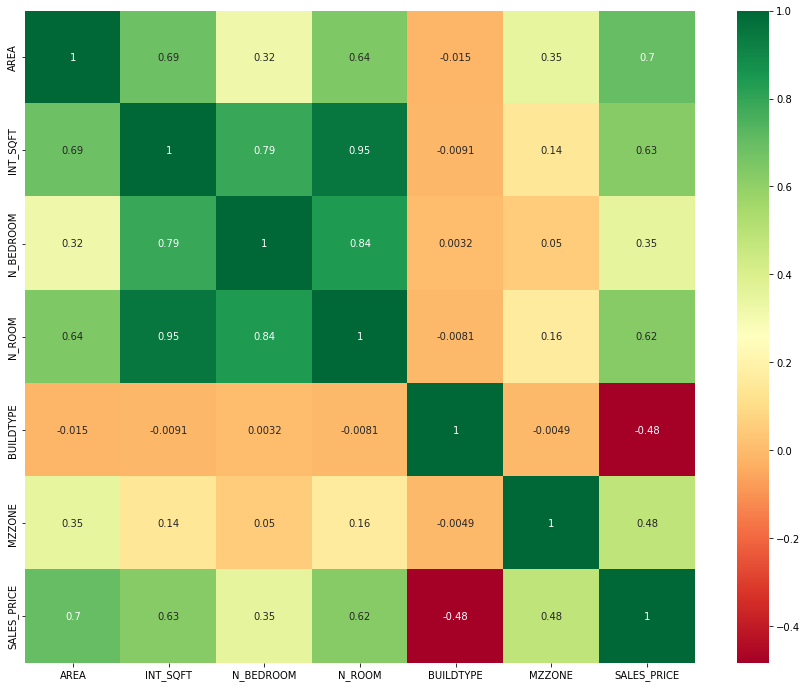

In [460]:
corr = data.corr()
Highest_corr_features = corr.index[abs(corr["SALES_PRICE"])>0.2]
plt.figure(figsize=(15,12))
g = sns.heatmap(data[Highest_corr_features].corr(),annot=True,cmap="RdYlGn")

In [461]:
Highest_corr_features

Index(['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_ROOM', 'BUILDTYPE', 'MZZONE',
       'SALES_PRICE'],
      dtype='object')

* **Postive Correlation :** INT_SQFT, N_BEDROOM, N_ROOM, MZZONE .
* **Negative Correlation :** BUILDTYPE .

In [462]:
data.corr()['SALES_PRICE'].sort_values(ascending=False)

SALES_PRICE      1.000000
AREA             0.701067
INT_SQFT         0.627225
N_ROOM           0.624491
MZZONE           0.483901
N_BEDROOM        0.353361
STREET           0.168327
PARK_FACIL       0.158637
N_BATHROOM       0.132627
UTILITY_AVAIL    0.069859
SALE_COND        0.027155
QS_ROOMS         0.021800
QS_BEDROOM       0.020492
QS_OVERALL       0.018526
DIST_MAINROAD    0.013860
QS_BATHROOM     -0.009963
AGE_OF_HOUSE    -0.137666
BUILDTYPE       -0.483708
Name: SALES_PRICE, dtype: float64

In [463]:
data.columns

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'QS_OVERALL', 'SALES_PRICE', 'AGE_OF_HOUSE'],
      dtype='object')

In [464]:
X = data[['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM',
          'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
          'STREET', 'MZZONE', 'QS_OVERALL', 'AGE_OF_HOUSE']].values # array of features
y = data['SALES_PRICE'].values # array of targets

## **Spliting the Data :**

In [465]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## **Scaling the Data :**

In [466]:
from sklearn.preprocessing import StandardScaler # Standrard scaling 
scaler = StandardScaler() # Initialise to a variable
scaler.fit(X_train,y_train) # It will find the Mean and Standard Deviation value in the Train data
X_train_scaled = scaler.transform(X_train) # Fit (mean, sd)
X_test_scaled = scaler.transform(X_test) # Transform the test data

# **Model Training :**

## **Linear Regression :**

In [467]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [468]:
y_pred = regressor.predict(X_test_scaled)

In [469]:
print(regressor.intercept_) # c 

16.14454853766702


In [470]:
print(regressor.coef_)

[ 0.0897606   0.0519827  -0.12107844  0.01675792  0.18010668  0.00892951
  0.05313741 -0.16549844  0.00834295  0.04050692  0.10286586  0.00417672
 -0.02471763]


### **Metrics (Evaluation) :**

In [471]:
from sklearn import metrics
print('R2- Score for Linear Regression:', metrics.r2_score(y_test,y_pred))

R2- Score for Linear Regression: 0.9024994358282363


## **XG Boost :**

In [472]:
import warnings
warnings.filterwarnings('ignore')

In [473]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import numpy as np
for lr in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  model = xgb.XGBRegressor(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model
  model.fit(X_train_scaled,y_train) # train the model
  model.score(X_test_scaled, y_test) # scoring the model - r2 squared
  print("Learning rate : ", lr, " Train score : ", model.score(X_train_scaled,y_train), " Cross-Val score : ", np.mean(cross_val_score(model, X_train_scaled, y_train, cv=10)))

Learning rate :  0.01  Train score :  -268.4156911132029  Cross-Val score :  -269.79444572137584
Learning rate :  0.02  Train score :  -34.57538133451951  Cross-Val score :  -34.77294184587261
Learning rate :  0.03  Train score :  -3.6647824123623174  Cross-Val score :  -3.6966228272341666
Learning rate :  0.04  Train score :  0.3603612330445404  Cross-Val score :  0.35187966332278525
Learning rate :  0.05  Train score :  0.8840958165034979  Cross-Val score :  0.8798382670851763
Learning rate :  0.06  Train score :  0.9589655152862431  Cross-Val score :  0.955695983041225
Learning rate :  0.07  Train score :  0.9734852648590882  Cross-Val score :  0.9714779544970307
Learning rate :  0.08  Train score :  0.9807918959472585  Cross-Val score :  0.9783937805886005
Learning rate :  0.09  Train score :  0.9846267496395269  Cross-Val score :  0.9819362194202619
Learning rate :  0.1  Train score :  0.9871110955557695  Cross-Val score :  0.9849506838377631
Learning rate :  0.11  Train score :  

### **Metrics (Evaluation) :**

In [474]:
model = xgb.XGBRegressor(learning_rate = 0.5, n_estimators=100)
model.fit(X_train_scaled,y_train) # train the model
print("R2 Score for XG Boost Algorithm : ",model.score(X_test_scaled, y_test)) # scoring the model - r2 squared

[11:40:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2 Score for XG Boost Algorithm :  0.9950569774602392


## **KNN Algorithm :**

In [475]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 3)
knn.fit(X_train_scaled, y_train)
Y_pred = knn.predict(X_test_scaled)

### **Metrics (Evaluation) :**

In [477]:
from sklearn.metrics import r2_score
print("R2 Score for KNN Algorithm : ", knn.score(X_train_scaled, y_train)) #predicting using the model

R2 Score for KNN Algorithm :  0.9489652323745336


## **Random Forest Regressor :**

In [478]:
# # Labels are the values we want to predict
original_labels = np.array(data['SALES_PRICE']) # target varaibles

# Remove the labels from the features
# axis 1 refers to the columns
original_features= data.drop('SALES_PRICE', axis = 1) #original features
original_features= data.drop('QS_ROOMS', axis = 1)
original_features= data.drop('QS_BATHROOM', axis = 1) 
original_features= data.drop('QS_BEDROOM', axis = 1) 
original_features= data.drop('DIST_MAINROAD', axis = 1) 
# Saving feature names for later use
original_feature_list = list(data.columns) #orginal feature labels

# Convert to numpy array
original_features = np.array(original_features) 
original_features

# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
original_train_features, original_test_features, original_train_labels, original_test_labels = train_test_split(original_features, original_labels, test_size = 0.25, random_state = 42)

In [479]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Instantiate model 
rf = RandomForestRegressor(n_estimators= 100, max_depth = 3, max_features='sqrt')

# Train the model on training data
rf.fit(original_train_features, original_train_labels);

# Use the forest's predict method on the test data
predictions = rf.predict(original_test_features)

### **Metrics (Evaluation) :**

In [480]:
from sklearn.metrics import r2_score
print('R2 - Score for Random Forest Regressor:', r2_score(predictions, original_test_labels))

R2 - Score for Random Forest Regressor: 0.7535351969220487


## **Decision Tree Regressor :**

In [481]:
# Spliting
X = data[['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM',
          'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
          'STREET', 'MZZONE', 'QS_OVERALL', 'AGE_OF_HOUSE']].values # array of features
y = data['SALES_PRICE'].values # array of targets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [482]:
from sklearn.tree import DecisionTreeRegressor

# Instantiate DecisionTree
DecisionTree = DecisionTreeRegressor()

# Fit DecisionTree to the training set
DecisionTree.fit(X_train, y_train)

DecisionTreeRegressor()

### **Metrics (Evaluation) :**

In [483]:
from sklearn.metrics import mean_squared_error, r2_score

# Compute y_pred
y_pred = DecisionTree.predict(X_test)

# Compute mse_DecisionTree
mse_DecisionTree = mean_squared_error(y_test, y_pred)
rsquared = r2_score(y_test,y_pred)

print("R2 Score of DecisionTree: ", rsquared)

R2 Score of DecisionTree:  0.9576295484023526
